# Importation  des données MINST et des bibliothéques

In [1]:
# Importation du dataset MINST depuis Keras
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

C:\Users\ouizb\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ouizb\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ouizb\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ouizb\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

Le dataste comporte des nombres de 0 à 9 de 28 sur 28 pixels. Les images sont monochromes.

In [2]:
# vérifions le type : ceux sont de numpy array
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [3]:
print(x_train.shape)
print(x_test.shape)
print(f'x_train comporte {x_train.shape[0]} images')
print(f'x_test comporte  {x_test.shape[0]} images')

(60000, 28, 28)
(10000, 28, 28)
x_train comporte 60000 images
x_test comporte  10000 images


<Figure size 432x288 with 0 Axes>

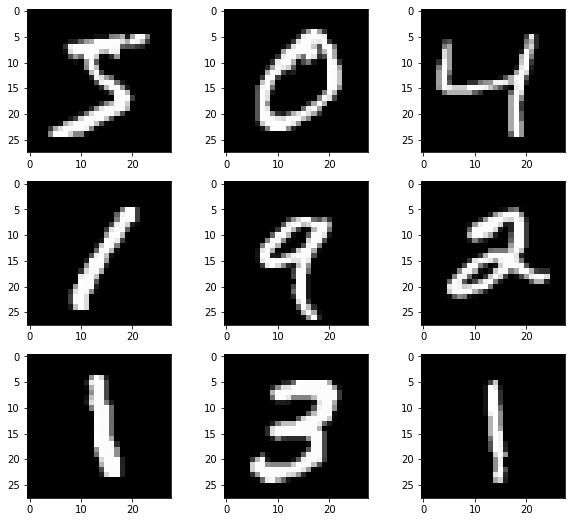

In [4]:
import matplotlib.pyplot as plt
plt.gray()
plt.figure(figsize = (10,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])

In [5]:
# Exemple d'impression dans y_train
for i in range(5):
    print(y_train[i])

5
0
4
1
9


## Prétraitement des données

In [6]:
# Vérification des valeurs minimale et maximale de x_train
print(x_train.min())
print(x_train.max())

0
255


In [7]:
# On s'assurer que les valeurs sont flottantes afin que nous puissions obtenir des points décimaux après la division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [8]:
# Normaliser les codes RVB en les divisant par la valeur RVB maximale.
x_train = x_train/255.0
x_test = x_test/255.0

In [9]:
# Vérification des valeurs minimale et maximale de x_train
print(x_train.min())
print(x_train.max())

0.0
1.0


Les données d'entrée doivent être converties du format tridimensionnel au format bidimensionnel pour être introduites dans l'algorithme de clustering K-Means. Par conséquent, les données d'entrée doivent être remodelées.

In [10]:
# Redimmension des données d'entrée
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

In [11]:
# Vérification des dimensions
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Maintenant que le prétraitement des données est terminé, nous passons à la construction du modèle avec Mini Batch K-Means.

## Construction du modèle Mini Batch K-Means

Mini Batch K-Means fonctionne de manière similaire à l'algorithme K-Means. La différence est que dans le Mini Batch K-Means, l'étape la plus coûteuse en calcul est effectuée uniquement sur un échantillon aléatoire d'observations par opposition à toutes les observations. Cette approche peut réduire considérablement le temps nécessaire à l'algorithme pour trouver la convergence avec seulement un faible coût en qualité.

In [12]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np
total_clusters = len(np.unique(y_test))
# Initialisation du modèle K-means
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
kmeans.fit(X_train)

MiniBatchKMeans(n_clusters=10)

In [13]:
kmeans.labels_

array([9, 0, 4, ..., 9, 8, 1])

Les images sont classées en groupes en fonction de la similitude des valeurs de pixels. Chaque image se voit attribuer une valeur d'étiquette de cluster donnée par kmeans.labels_. Mais kmeans.labels_ ne désigne que le cluster auquel appartient l'image. Il ne désigne pas le nombre affiché dans l'image.

On va créer une fonction qui associe  le label le plus probable à chaque cluster dans le modèle KMeans 
qui renvoie un  dictionnaire des clusters assignés à chaque label.

In [16]:
#reference_labels = {}
def retrieve_info(cluster_labels,y_train):
    reference_labels = {}
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    return reference_labels

In [ ]:
reference_labels = retrieve_info(kmeans.labels_,y_train)

In [18]:
print(reference_labels)

{0: 0, 1: 1, 2: 3, 3: 7, 4: 4, 5: 2, 6: 0, 7: 1, 8: 6, 9: 8}


Regardons reference_label: c'est à dire au cluster 0  on a le groupe d'image 0 , au cluster 1 on a le groupe d'image 1, au cluster 2 on a le groupe d'image 3 etc...). Le 0 apparaît deux fois et le 5 aucune.

Avec la fonction 'retrieve_info' nous allons imprimer le 'y_pred' prédit et la comparer l'étiquette réelle pour les 20 premiers exemples

In [22]:
y_pred = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    y_pred[i] = reference_labels[kmeans.labels_[i]]

In [23]:
# Comparaison des valeurs prévues et des valeurs réelles
print(y_pred[:20].astype('int'))
print(y_train[:20])

[8 0 4 1 7 2 1 8 1 7 8 1 0 6 1 7 2 1 6 1]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


## Accuracy score

In [27]:
# accuracy score
from sklearn.metrics import accuracy_score
print(f'L\'accuracy score: {accuracy_score(y_pred,y_train)}')

L'accuracy score: 0.5364833333333333


## Optimisation de l'algorithme

In [29]:
def calculate_metrics(model,output):
    print(f'Le nombre de cluster est de {model.n_clusters}')
    print(f'L\'inertie est de: {model.inertia_}')
    print(f'L\'homogeneîté est de: {metrics.homogeneity_score(output,model.labels_)}')

In [33]:
from sklearn import metrics
cluster_number = [10,16,36,64,144,256]
for i in cluster_number:
    total_clusters = len(np.unique(y_test))

kmeans = MiniBatchKMeans(n_clusters = i)
kmeans.fit(X_train) 
calculate_metrics(kmeans,y_train)
# Calcule des  reference_labels
reference_labels = retrieve_info(kmeans.labels_,y_train)
# y_pred la prediction des label
y_pred = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    y_pred[i] = reference_labels[kmeans.labels_[i]]
    
print(f'L\'accuracy est de: {accuracy_score(y_pred,y_train)}')


Le nombre de cluster est de 256
L'inertie est de: 1524869.4353027344
L'homogeneîté est de: 0.8338232337295962
L'accuracy est de: 0.8949666666666667


J'ai fait des testes allant jusqu'a 640  cluster, j'obtiens 91% d'accuracy y a pas énormement de différence pour un si grand nombre de cluster je pense pas que se soit judicieux. Le fait d'avoir 256 clusters pour 10 nombre vient du faite que se soit écrit à la main et qu'il y'ai plusieurs maniéres d'écrire une nombre. Chacun son écriture !!!!

**Résultat obtenu pour 640 clusters**:

- Le nombre de cluster est de 640
- L'inertie est de: 1352653.5
- L'homogeneîté est de: 0.8793984040204451
- L'accuracy est de: 0.9177833333333333

La précision est de 89% pour «nombre de clusters» = 256. Par conséquent, nous exécutons le modèle sur l'ensemble de test pour le nombre de clusters = 256.

In [34]:
# Testdu modèle sur le Test set
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X_test)
# Calcule des metriques
calculate_metrics(kmeans,y_test)
# Calcule des reference_labels
reference_labels = retrieve_info(kmeans.labels_,y_test)
# y_pred nos predictions
y_pred = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    y_pred[i] = reference_labels[kmeans.labels_[i]]
    
    
print(f'L\'accuracy est de: {accuracy_score(y_pred,y_test)}')

Le nombre de cluster est de 256
L'inertie est de: 246385.20764160156
L'homogeneîté est de: 0.846303913581639
L'accuracy est de: 0.8883
